In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [5]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [6]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('cleaned stockdata.csv', index_col=0)

In [8]:
stockdata=pd.get_dummies(data=stockdata, columns=['Sector', 'Country.1','IQ_AUDITOR_OPINION'], drop_first=True, dummy_na=True).drop(['Country.1_nan','IQ_AUDITOR_OPINION_nan'],axis=1)

In [9]:
#To create a categorical variable based on effective annual return.
stockdata['Positive or negative returns'] = [1 if x >= 0 else 0 for x in stockdata['Effective annual return']]

# Artificial Neural Networks

**Regression**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [79]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
16/16 [==============================] - 1s 7ms/step - loss: 0.0239 - val_loss: 0.0247
Epoch 2/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0240
Epoch 3/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0236
Epoch 4/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0232
Epoch 5/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.0228
Epoch 6/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.0231
Epoch 7/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0224
Epoch 8/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0221
Epoch 9/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0218
Epoch 10/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0217
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0208
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0209
Epoch 85/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0215
Epoch 86/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0210
Epoch 87/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0211
Epoch 88/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0211
Epoch 89/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0211
Epoch 90/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0212
Epoch 91/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0211
Epoch 92/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0208
Epoch 93/400


16/16 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0223
Epoch 246/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0226
Epoch 247/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0225
Epoch 248/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0223
Epoch 249/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0223
Epoch 250/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0223
Epoch 251/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0228
Epoch 252/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0225
Epoch 253/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.0224
Epoch 254/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0227
Epoc

<AxesSubplot:>

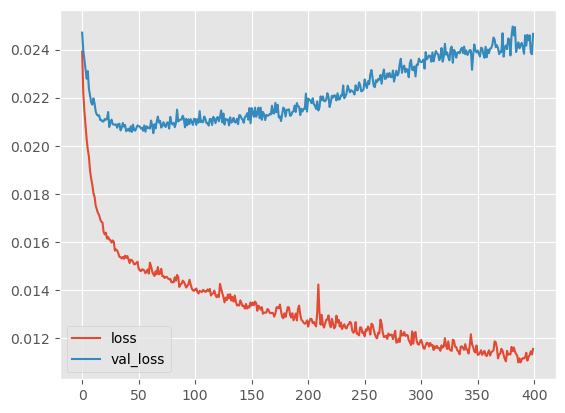

In [80]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Overfitting due to high number of epochs. We will introduce early stopping to prevent overfitting.

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(scaler.transform(X_test))

27/27 [==============================] - 0s 577us/step


In [82]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.10920851110734096
RMSE: 0.15700717801798772


In [18]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [110]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [111]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 7ms/step - loss: 0.0302 - val_loss: 0.0258
Epoch 2/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.0245
Epoch 3/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0235
Epoch 4/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.0229
Epoch 5/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0223
Epoch 6/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.0219
Epoch 7/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0215
Epoch 8/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0212
Epoch 9/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0211
Epoch 10/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0210
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0208
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0208
Epoch 85/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0204
Epoch 86/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0205
Epoch 87/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0207
Epoch 88/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0205
Epoch 89/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0209
Epoch 90/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0206
Epoch 91/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0205
Epoch 91: early stopping


<AxesSubplot:>

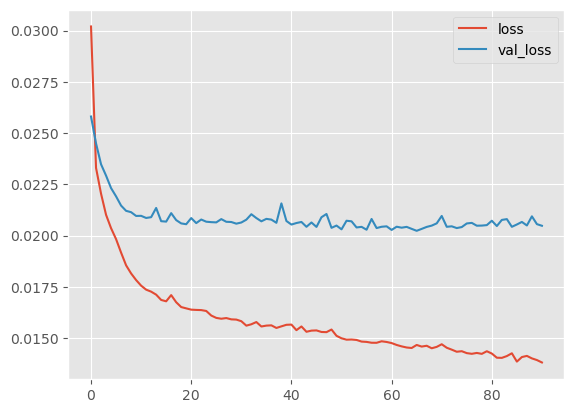

In [112]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [113]:
predictions = model.predict(scaler.transform(X_test))

27/27 [==============================] - 0s 577us/step


In [114]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.10152813445398569
RMSE: 0.1431150506210121


In [120]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [121]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 7ms/step - loss: 0.0316 - val_loss: 0.0254
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.0254
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.0250
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.0245
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0242
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 0.0241
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0242
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0239
Epoch 9/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.0234
Epoch 10/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.0230
Epoch 11/

16/16 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.0200
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0199
Epoch 85/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0200
Epoch 86/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0199
Epoch 87/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 88/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0199
Epoch 89/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0200
Epoch 90/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0198
Epoch 91/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0199
Epoch 92/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0200
Epoch 93/400


<AxesSubplot:>

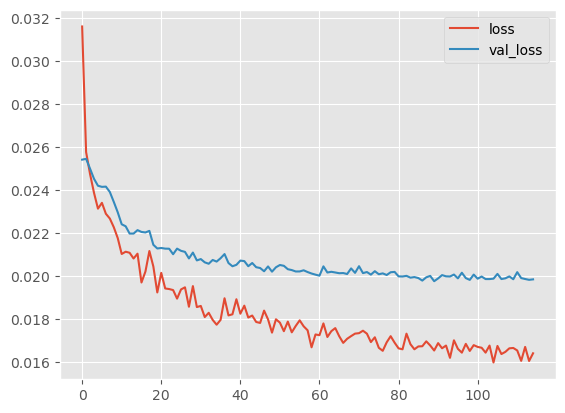

In [122]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [123]:
predictions = model.predict(scaler.transform(X_test))

27/27 [==============================] - 0s 577us/step


In [124]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.10000454005261313
RMSE: 0.14088905052298825


In [125]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [126]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 7ms/step - loss: 0.0370 - val_loss: 0.0254
Epoch 2/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0248
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0251
Epoch 4/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.0246
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 0.0248
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.0244
Epoch 7/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0242
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0243
Epoch 9/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0241
Epoch 10/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0239
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0203
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0204
Epoch 85/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0203
Epoch 86/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0204
Epoch 87/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0203
Epoch 88/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0204
Epoch 89/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0202
Epoch 90/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0203
Epoch 91/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0203
Epoch 92/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0202
Epoch 93/400


<AxesSubplot:>

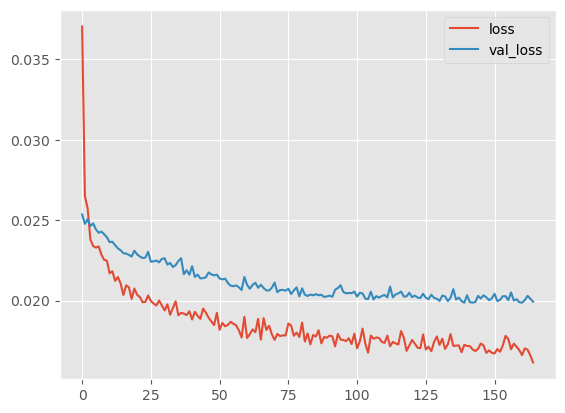

In [127]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [128]:
predictions = model.predict(scaler.transform(X_test))

27/27 [==============================] - 0s 616us/step


In [129]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.09975839980790169
RMSE: 0.14120458564221403


In [132]:
#Remove the dummy variables for Country.1 except for Country.1_United States
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [134]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [135]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 7ms/step - loss: 0.0464 - val_loss: 0.0247
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.0244
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.0245
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0247
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.0248
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.0249
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0248
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0247
Epoch 9/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.0247
Epoch 10/400
16/16 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0246
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0209
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0208
Epoch 85/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0207
Epoch 86/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0208
Epoch 87/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0207
Epoch 88/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0208
Epoch 89/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0207
Epoch 90/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0209
Epoch 91/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0207
Epoch 92/400
16/16 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0210
Epoch 93/400


<AxesSubplot:>

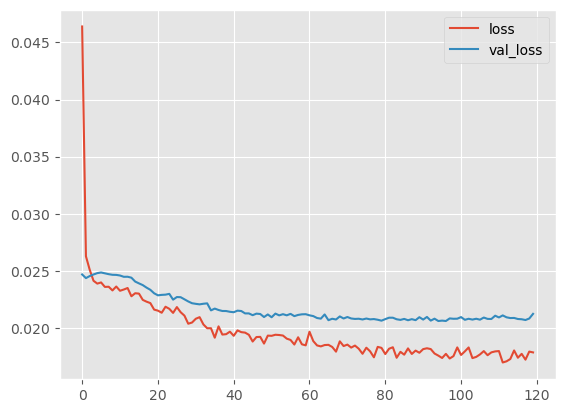

In [136]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [137]:
predictions = model.predict(scaler.transform(X_test))

27/27 [==============================] - 0s 577us/step


In [138]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.10207678419508102
RMSE: 0.14572132124835158


No further feature selection is performed as the model performs better with all dummy variables.

**Classification**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [186]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [187]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 8ms/step - loss: 0.7113 - val_loss: 0.6790
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 0.6744 - val_loss: 0.6577
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.6514 - val_loss: 0.6287
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.6088 - val_loss: 0.5774
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5727 - val_loss: 0.5436
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5613 - val_loss: 0.5398
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5614 - val_loss: 0.5352
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5455 - val_loss: 0.5275
Epoch 9/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5382 - val_loss: 0.5198
Epoch 10/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5262 - val_loss: 0.5075
Epoch 11/

16/16 [==============================] - 0s 3ms/step - loss: 0.4039 - val_loss: 0.4442
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.3908 - val_loss: 0.4471
Epoch 85/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4009 - val_loss: 0.4475
Epoch 86/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4053 - val_loss: 0.4493
Epoch 86: early stopping


<AxesSubplot:>

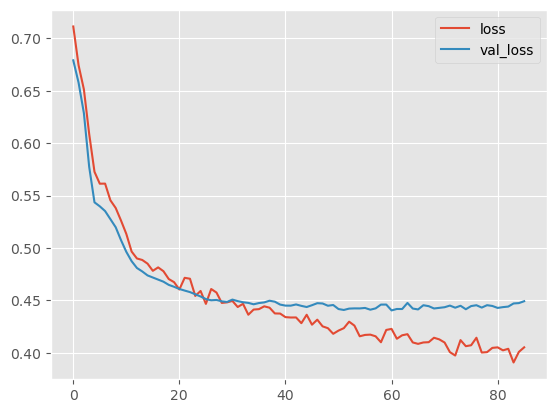

In [188]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [189]:
predictions = (model.predict(scaler.transform(X_test)) > 0.5).astype("int32")

27/27 [==============================] - 0s 552us/step


In [190]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49       205
           1       0.83      0.94      0.88       647

    accuracy                           0.81       852
   macro avg       0.75      0.66      0.68       852
weighted avg       0.79      0.81      0.79       852



In [191]:
print(confusion_matrix(y_test,predictions))

[[ 79 126]
 [ 39 608]]


In [14]:
#Remove the dummy variables for Country.1 except for Country.1_United States
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [16]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [19]:
model.fit(x=scaled_features,y=y_train.values,
          validation_data=(scaler.transform(X_test),y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
16/16 [==============================] - 1s 10ms/step - loss: 0.7221 - val_loss: 0.6798
Epoch 2/400
16/16 [==============================] - 0s 3ms/step - loss: 0.6722 - val_loss: 0.6486
Epoch 3/400
16/16 [==============================] - 0s 3ms/step - loss: 0.6343 - val_loss: 0.6070
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5962 - val_loss: 0.5610
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5655 - val_loss: 0.5442
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5612 - val_loss: 0.5388
Epoch 7/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5509 - val_loss: 0.5356
Epoch 8/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5443 - val_loss: 0.5304
Epoch 9/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5396 - val_loss: 0.5221
Epoch 10/400
16/16 [==============================] - 0s 3ms/step - loss: 0.5264 - val_loss: 0.5148
Epoch 11

16/16 [==============================] - 0s 3ms/step - loss: 0.4439 - val_loss: 0.4611
Epoch 84/400
16/16 [==============================] - 0s 2ms/step - loss: 0.4509 - val_loss: 0.4609
Epoch 85/400
16/16 [==============================] - 0s 2ms/step - loss: 0.4431 - val_loss: 0.4611
Epoch 86/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4376 - val_loss: 0.4614
Epoch 87/400
16/16 [==============================] - 0s 2ms/step - loss: 0.4340 - val_loss: 0.4620
Epoch 88/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4457 - val_loss: 0.4638
Epoch 89/400
16/16 [==============================] - 0s 2ms/step - loss: 0.4402 - val_loss: 0.4641
Epoch 90/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4391 - val_loss: 0.4635
Epoch 91/400
16/16 [==============================] - 0s 2ms/step - loss: 0.4414 - val_loss: 0.4615
Epoch 92/400
16/16 [==============================] - 0s 3ms/step - loss: 0.4414 - val_loss: 0.4602
Epoch 92: ear

<AxesSubplot:>

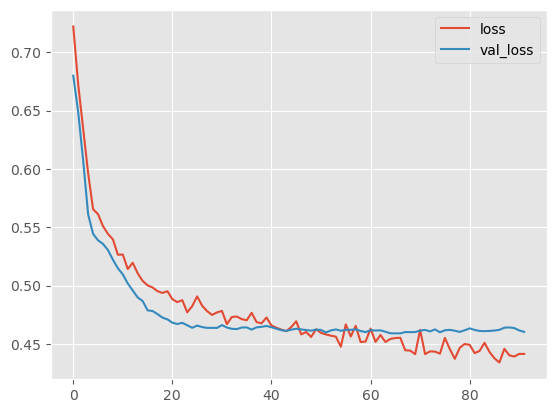

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
predictions = (model.predict(scaler.transform(X_test)) > 0.5).astype("int32")

27/27 [==============================] - 0s 581us/step


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.37      0.46       205
           1       0.82      0.92      0.87       647

    accuracy                           0.79       852
   macro avg       0.71      0.65      0.66       852
weighted avg       0.77      0.79      0.77       852



In [23]:
print(confusion_matrix(y_test,predictions))

[[ 76 129]
 [ 51 596]]


**Artificial Neural Networks Regression model metrics**

|**Features**|**RMSE**|
|---------------------------|-----|
|adam optimizer, 400 epochs, with all 91 features including all dummy variables|0.15700717801798772|
|adam optimizer, 41 epochs (with early stopping callback), with all 91 features including all dummy variables|0.1431150506210121|
|adam optimizer, 115 epochs (with early stopping callback), with dropout layers, with all 91 features including all dummy variables|**0.14088905052298825**|
|rmsprop optimizer, 165 epochs (with early stopping callback), with dropout layers, with all 91 features including all dummy variables|0.14120458564221403|
|adam optimizer, 120 epochs (with early stopping callback), with dropout layers, with Country.1 dummy variables removed except Country.1_United States (45 features)|0.14572132124835158|

**Artificial Neural Networks Classification model metrics**

|**Features**|**Accuracy**|**Weight avg f1-score**|
|---------------------------|-----|---|
|adam optimizer, 86 epochs (with early stopping callback), with dropout layers, with all 91 features including all dummy variables|**0.81**|**0.79**|
|adam optimizer, 92 epochs (with early stopping callback), with dropout layers, with Country.1 dummy variables removed except Country.1_United States (45 features)|0.79|0.77|